<a href="https://colab.research.google.com/github/bhavangond/TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating data

In [ ]:
from sklearn.datasets import make_circles

# Make examples
n_samples=1000

# Create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Visualize the data

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


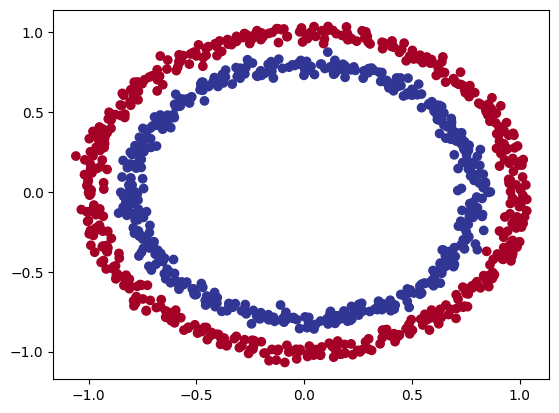

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

## Modeling

In [ ]:
import tensorflow as tf

# Set random sees
tf.random.set_seed(42)

#1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4658 - loss: 6.6140
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4258 - loss: 5.6413
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4328 - loss: 4.6877
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4823 - loss: 1.4372
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4792 - loss: 0.7448


In [ ]:
# Improve the model by training longer
model_1.fit(X,y,epochs=200,verbose=0)


In [ ]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [ ]:
# Improve model with adding extra layer


# Set random sees
tf.random.set_seed(42)

#1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
# Evaluate
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6930


[0.6933462023735046, 0.5]

## Improving the model

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 0.6923


[0.6932751536369324, 0.4970000088214874]

In [ ]:
# function to visualize the prediction
import numpy as np
def plot_decision_boundary(model,X,y):

  #Define the axis boundaries of the plot
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  # Create X value
  x_in=np.c_[xx.ravel(),yy.ravel()]

  # Make prediction
  y_pred=model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


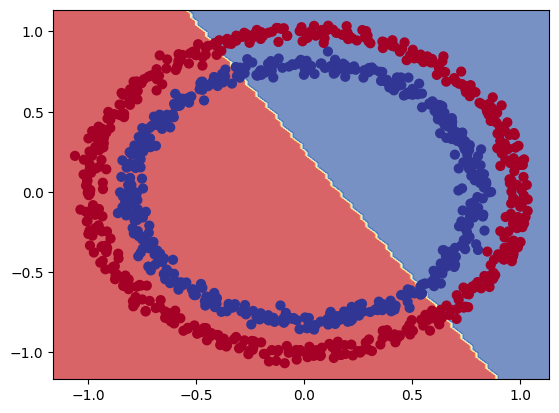

In [ ]:
plot_decision_boundary(model=model_3,X=X,y=y)

## Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])

model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4522 - loss: 6.6889   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4507 - loss: 6.6603
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4557 - loss: 6.6483
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4608 - loss: 6.6261
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4611 - loss: 6.6214
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4605 - loss: 6.6142
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4635 - loss: 6.6104
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4620 - loss: 6.5701
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4620 - loss: 6.5667
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4620 - loss: 6.5649
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4620 - loss: 6.5637
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


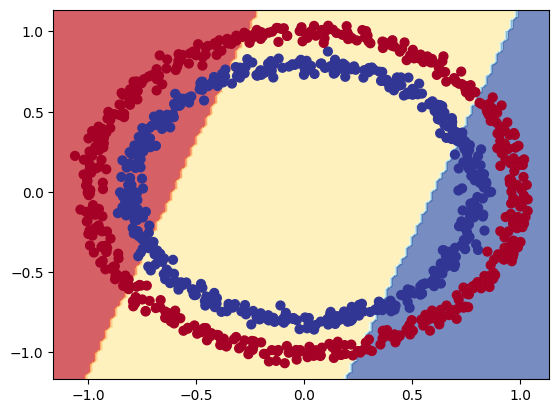

In [ ]:
plot_decision_boundary(model=model_4,X=X,y=y)

In [ ]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4151 - loss: 4.5747
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4188 - loss: 4.5343
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4195 - loss: 4.5291
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4215 - loss: 4.5205 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4223 - loss: 4.5154
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4189 - loss: 4.5008
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4191 - loss: 4.4445
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4271 - loss: 4.3956
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4397 - loss: 4.3658
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - loss: 4.2437
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 4.2291
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [ ]:
# multilayer neural network

tf.random.set_seed(42)

model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
       tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4557 - loss: 4.9264
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4618 - loss: 4.4931
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4619 - loss: 4.1936
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4593 - loss: 3.6105
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4621 - loss: 3.1110
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4584 - loss: 2.8430
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4612 - loss: 2.5094
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4663 - loss: 1.8450
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4629 - loss: 1.0570
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4650 - loss: 0.9946
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4553 - loss: 0.9615
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


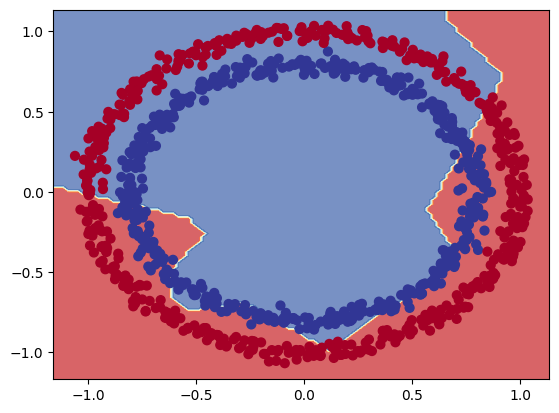

In [ ]:
plot_decision_boundary(model=model_6,X=X,y=y)

In [ ]:
tf.random.set_seed(42)

model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
       tf.keras.layers.Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5033 - loss: 0.7042
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4718 - loss: 0.7010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4640 - loss: 0.6988
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4729 - loss: 0.6972
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4612 - loss: 0.6959
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4587 - loss: 0.6948
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4658 - loss: 0.6938
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4708 - loss: 0.6931
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4810 - loss: 0.6923
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4779 - loss: 0.6916
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5309 - loss: 0.6910
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


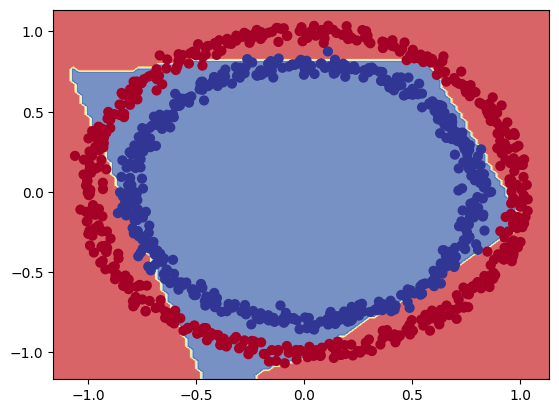

In [ ]:
plot_decision_boundary(model_7,X,y)

In [ ]:
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

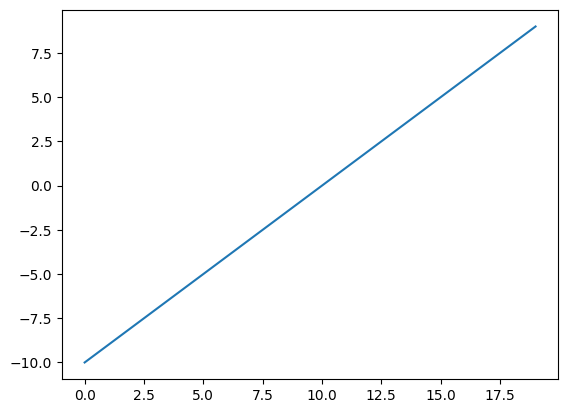

In [ ]:
plt.plot(A)

In [ ]:
#sigmoid function
def sigmoid(x):
  return 1/(1+tf.exp(-x))


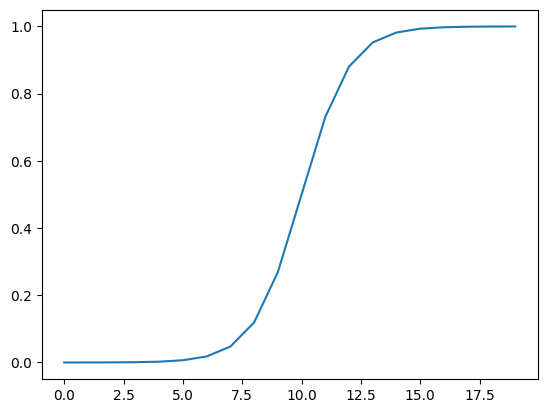

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# relu function
def relu(x):
  return tf.maximum(0,x)


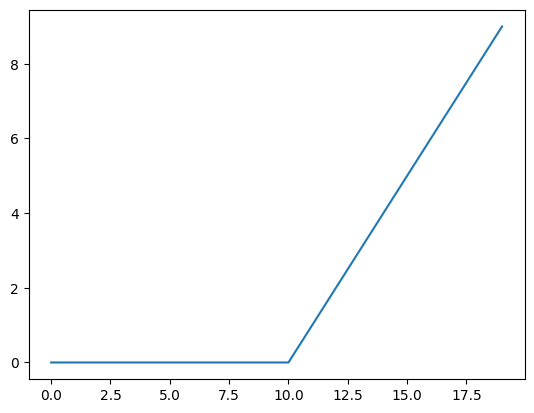

In [ ]:
plt.plot(relu(A))

# Evaluate and Improving the model

In [ ]:
len(X)

1000

In [ ]:
# SPlit into train and test
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]


In [ ]:
tf.random.set_seed(42)

model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
       tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history=model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4905 - loss: 0.6920
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5265 - loss: 0.6890
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5367 - loss: 0.6879
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5360 - loss: 0.6865
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5312 - loss: 0.6847
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5308 - loss: 0.6826
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5361 - loss: 0.6796 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5486 - loss: 0.6745
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5802 - loss: 0.6623 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6320 - loss: 0.6373
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7339 - loss: 0.5982 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8088 -

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9950 - loss: 0.0579 


[0.05581909790635109, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


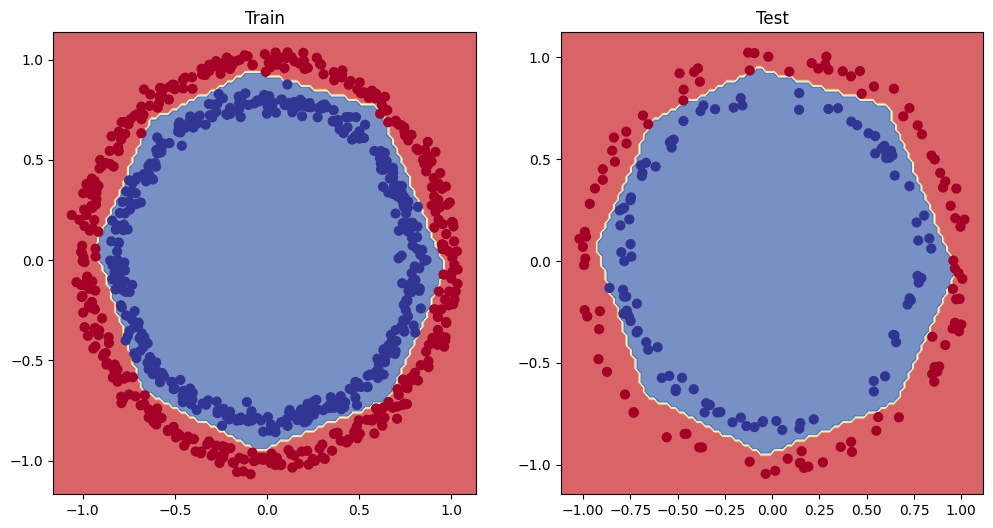

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show()

## Plot the loss curves

In [ ]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.48875,0.692281
1,0.50625,0.690199
2,0.51375,0.689225
3,0.51500,0.687940
4,0.51625,0.686048
5,0.52250,0.683789
6,0.53000,0.680551
7,0.54250,0.674472
8,0.60500,0.657486
9,0.68000,0.628285


Text(0.5, 1.0, 'loss curve')

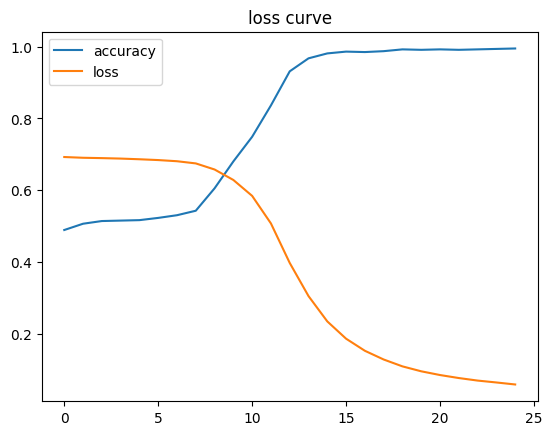

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("loss curve")

## Finding the best learning rate

In [ ]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
       tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
               optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

history_9=model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4890 - loss: 0.7482 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4924 - loss: 0.7459 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4938 - loss: 0.7434 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4943 - loss: 0.7409 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4924 - loss: 0.7382 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4936 - loss: 0.7354 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4962 - loss: 0.7326 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4988 - loss: 0.7297 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4994 - loss: 0.7268 - learning_

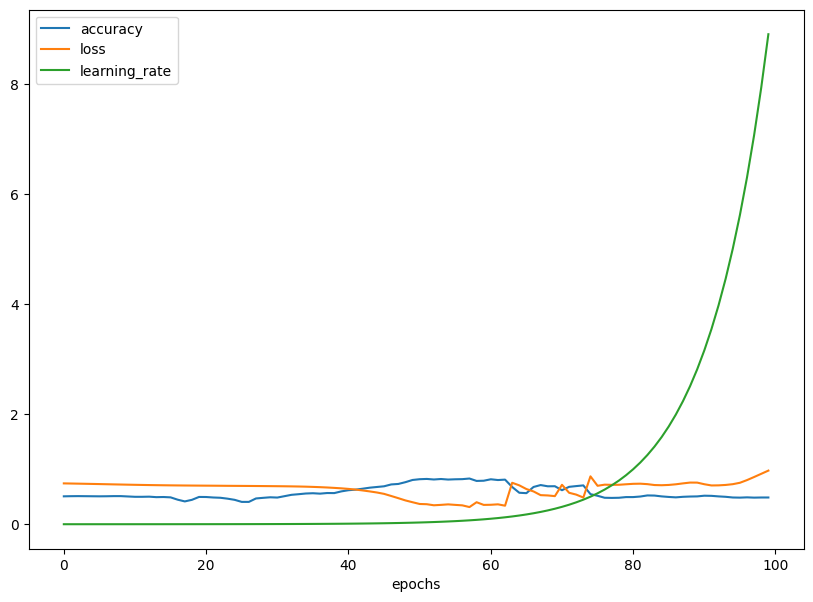

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs Loss')

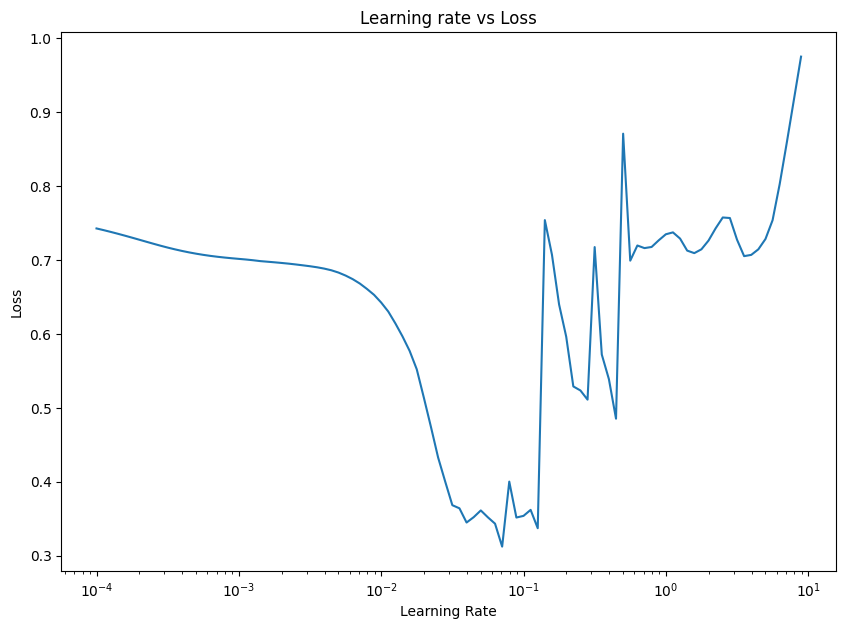

In [ ]:
# Plot the learning rate vs  the loss
lrs=1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
tf.random.set_seed(42)

model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
       tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])


history_10=model_10.fit(X_train,
                      y_train,
                      epochs=20
                      )

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5101 - loss: 0.6877
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5794 - loss: 0.6755
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5974 - loss: 0.6541 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6901 - loss: 0.6104
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8456 - loss: 0.5312 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9415 - loss: 0.4169 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9742 - loss: 0.3004 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.2228 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.1695 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.1322 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.1078 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9

In [ ]:
# Evaluate model 10
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9842 - loss: 0.0645  


[0.05669755861163139, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


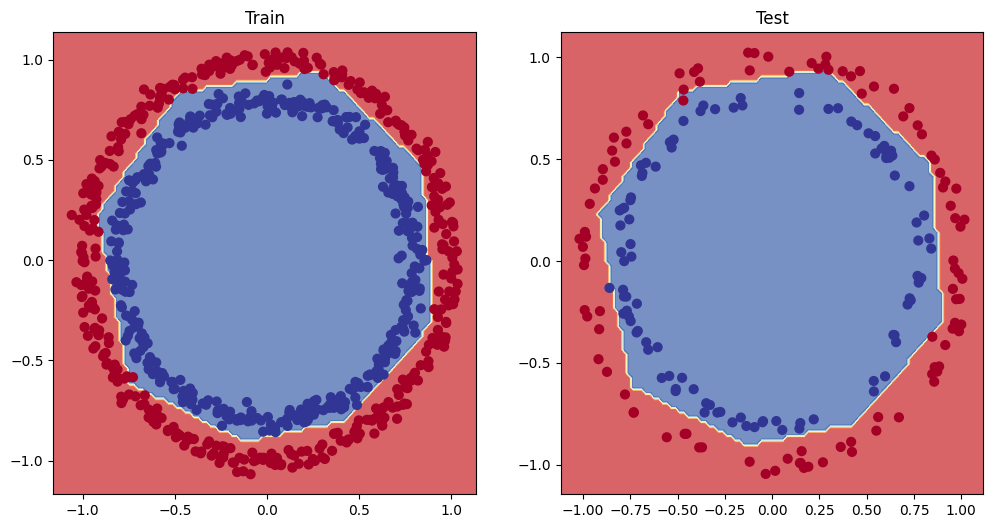

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

In [ ]:
## Chec k the accuracy of our model
loss,accuracy=model_10.evaluate(X_test,y_test)
loss,accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9842 - loss: 0.0645 


(0.05669755861163139, 0.9900000095367432)

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds=model_10.predict(X_test)

confusion_matrix(y_test,tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[100,   1],
       [  1,  98]])

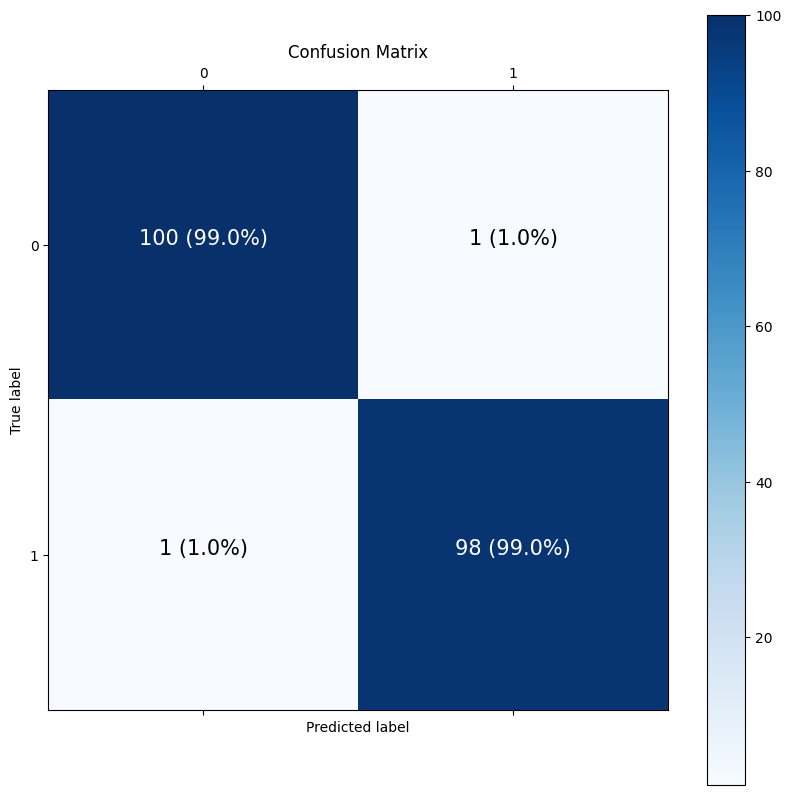

In [ ]:
import itertools




figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False  # Replace with actual class names list if available

if classes:
    labels = classes
else:
    labels = np.arange(n_classes)

# Label the axes
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks(np.arange(n_classes))
ax.set_yticks(np.arange(n_classes))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Set threshold for text color
threshold = (cm.max() + cm.min()) / 2

# Plot text inside cells
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

plt.show()




## Multiclass classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Train and test data
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data[0],test_data[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [ ]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

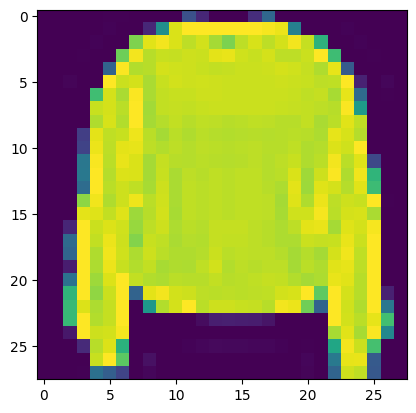

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [16]:
# Create list to see training labels
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

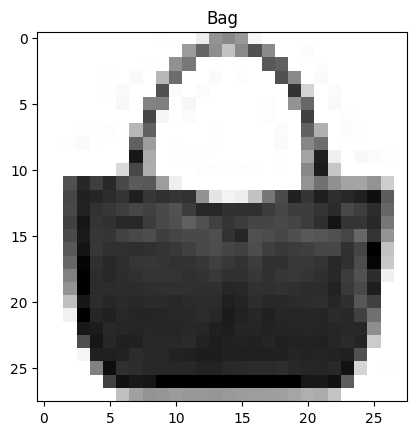

In [ ]:
index=100
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

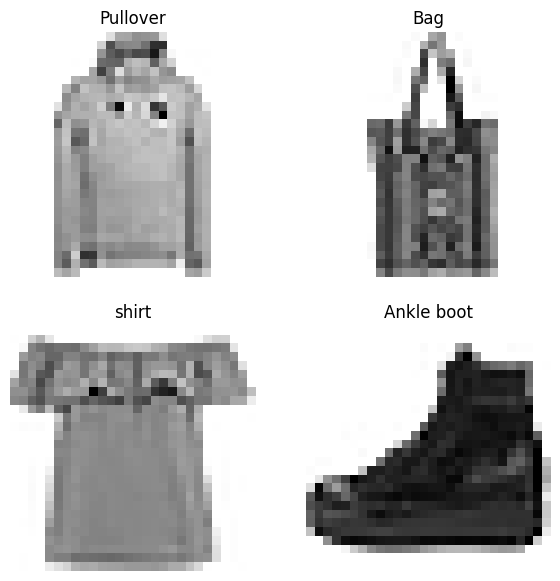

In [ ]:
# Plot multiple random images
import random
plt.figure(figsize=(7,7))

for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


In [4]:
# multi-class classification model

# input shape 28 X 28 (shape of image)
# output shape 10

# set random seed
tf.random.set_seed(42)

# Create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history=model_11.fit(train_data,
                              tf.one_hot(train_labels,10),
                              epochs=10,
                              validation_data=(test_data,tf.one_hot(test_labels,depth=10)))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1033 - loss: 2.5848 - val_accuracy: 0.1256 - val_loss: 2.2450
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1386 - loss: 2.2038 - val_accuracy: 0.2158 - val_loss: 1.8049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2336 - loss: 1.7993 - val_accuracy: 0.2354 - val_loss: 1.7274
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2688 - loss: 1.7150 - val_accuracy: 0.2879 - val_loss: 1.6483
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2804 - loss: 1.6599 - val_accuracy: 0.2724 - val_loss: 1.6400
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2797 - loss: 1.6475 - val_accuracy: 0.2617 - val_loss: 1.6472
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2816 - loss: 1.6307 - val_accuracy: 0.2631 - val_loss: 1.6288
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2810 - loss: 1.6352 -

In [ ]:
model_11.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
# normalizing
train_data.min(),train_data.max()

(np.uint8(0), np.uint8(255))

In [5]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [6]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history=model_12.fit(train_data_norm,
                             train_labels,
                              epochs=10,
                              validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3603 - loss: 1.7276 - val_accuracy: 0.5558 - val_loss: 1.1569
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6009 - loss: 1.0777 - val_accuracy: 0.7103 - val_loss: 0.8947
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7328 - loss: 0.8231 - val_accuracy: 0.7646 - val_loss: 0.7215
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7781 - loss: 0.6818 - val_accuracy: 0.7817 - val_loss: 0.6442
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7907 - loss: 0.6177 - val_accuracy: 0.7896 - val_loss: 0.6120
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7974 - loss: 0.5846 - val_accuracy: 0.7932 - val_loss: 0.5967
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8022 - loss: 0.5651 - val_accuracy: 0.7956 - val_loss: 0.5868
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8056 - loss: 0.5515 -

<Axes: title={'center': 'Normalized data'}>

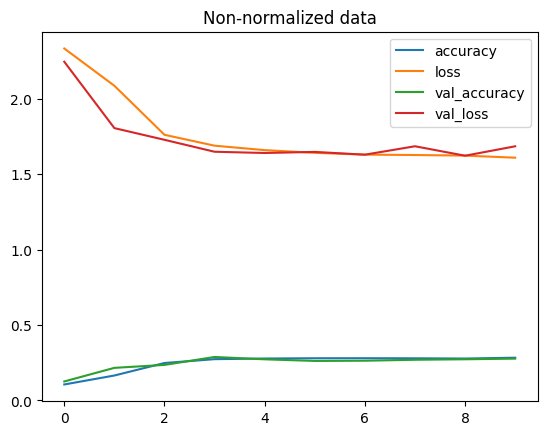

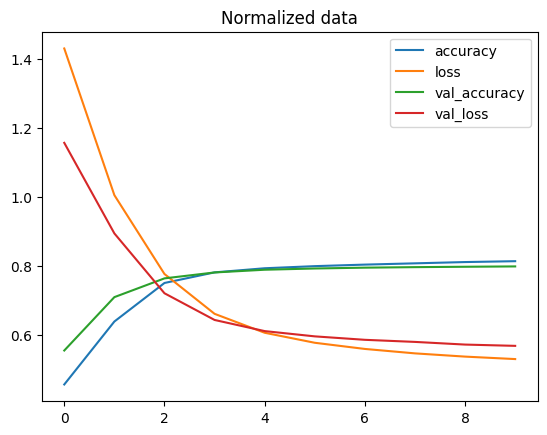

In [7]:
import pandas as pd

# Plot non-normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learning rate


In [31]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Create learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))
# Fit the model
find_lr_history=model_13.fit(train_data_norm,
                             train_labels,
                              epochs=40,
                              validation_data=(test_data_norm,test_labels),
                             callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2931 - loss: 1.7729 - val_accuracy: 0.6867 - val_loss: 0.9139 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7020 - loss: 0.8375 - val_accuracy: 0.7161 - val_loss: 0.7452 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7335 - loss: 0.7107 - val_accuracy: 0.7266 - val_loss: 0.7010 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7406 - loss: 0.6728 - val_accuracy: 0.7285 - val_loss: 0.6877 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7455 - loss: 0.6568 - val_accuracy: 0.7259 - val_loss: 0.6865 - learning_rate: 0.0016
Epoch 6/40
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7486 - loss: 0.6473

KeyboardInterrupt: 

Text(0.5, 1.0, 'Finding the ideal learning rate')

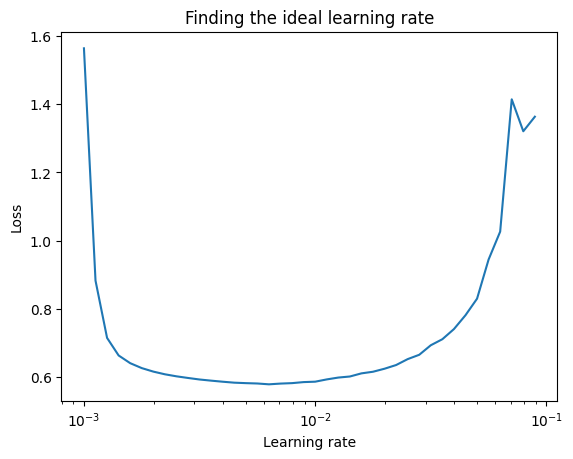

In [9]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [10]:
## Ideal learning rate is around 10^-3 (0.001)

## Evaluating our multi-class classification model

In [11]:
import itertools
from sklearn.metrics import confusion_matrix


figsize = (10, 10)
def make_confusion_matrix(y_true,y_pred,classes=None,figsize = (10, 10),text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

 # Replace with actual class names list if available

  if classes:
      labels = classes
  else:
      labels = np.arange(n_classes)

  # Label the axes
  ax.set_title("Confusion Matrix")
  ax.set_xlabel("Predicted label")
  ax.set_ylabel("True label")
  ax.set_xticks(np.arange(n_classes))
  ax.set_yticks(np.arange(n_classes))
  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)

  # Set threshold for text color
  threshold = (cm.max() + cm.min()) / 2

  # Plot text inside cells
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      ax.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=15)

  plt.show()

In [12]:
y_probs=model_13.predict(test_data_norm)
y_probs[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([0.0000000e+00, 0.0000000e+00, 2.1865162e-22, 0.0000000e+00,
       8.4434897e-36, 4.2428896e-02, 1.9421352e-35, 4.4991022e-01,
       7.5886052e-16, 5.0766093e-01], dtype=float32)

In [13]:
# convert prediction probability to integers
y_preds=y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 0, 0, 2, 0, 0, 2, 5, 7])

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[944,   0,  54,   0,   0,   1,   0,   0,   1,   0],
       [988,   0,  12,   0,   0,   0,   0,   0,   0,   0],
       [167,   0, 833,   0,   0,   0,   0,   0,   0,   0],
       [984,   0,  16,   0,   0,   0,   0,   0,   0,   0],
       [347,   0, 652,   0,   0,   1,   0,   0,   0,   0],
       [  8,   0,   3,   0,   0, 789,   0, 149,   5,  46],
       [410,   0, 589,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,  55,   0, 699,   0, 246],
       [ 77,   0, 880,   0,   0,  18,   0,   1,  22,   2],
       [ 11,   0,   1,   0,   0,   1,   0,  54,   0, 933]])

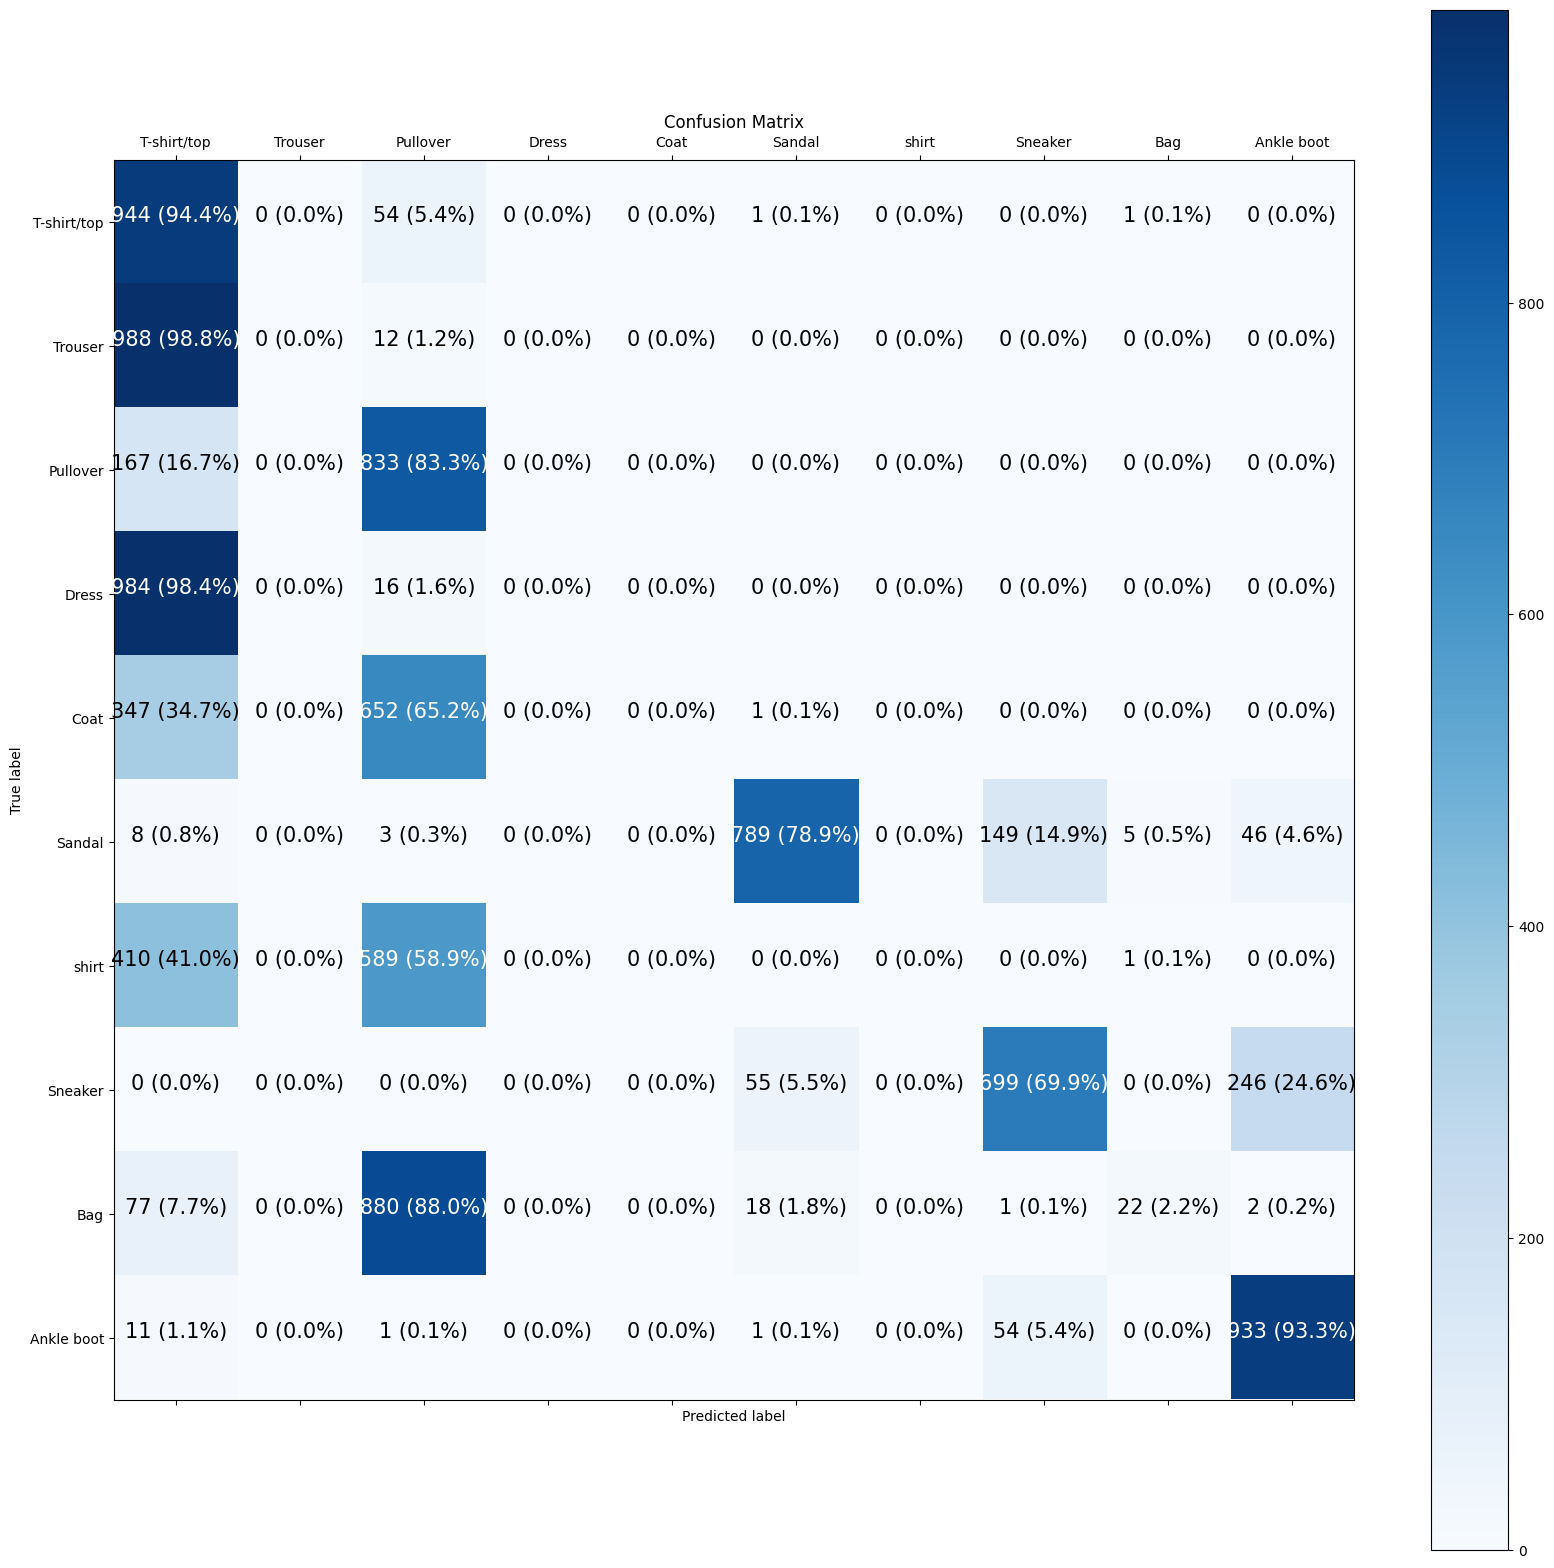

In [19]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(20,20),
                      text_size=10)

In [20]:
import random

def plot_random_image(model,images,true_labels,classes):
  # random integer
  i=random.randint(0,len(images))

  # Create predictions and target
  target_image=images[i];
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label==true_label:
    color="green"
  else:
    color="red"

  plt.xlabel("Pred: {} {:2.0f}%  (True: {})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


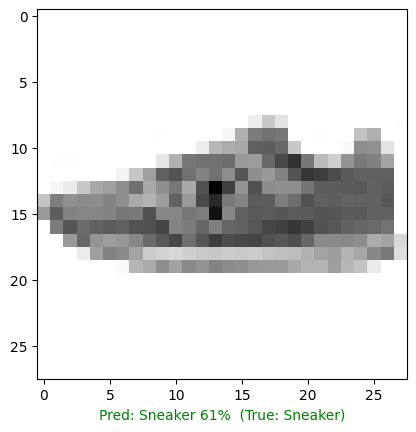

In [28]:
plot_random_image(model=model_13,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## Patterns learned by model

In [32]:
model_13.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [33]:
model_13.layers[1]

<Dense name=dense_9, built=True>

In [35]:
# Get the patterns
weights,biases=model_13.layers[1].get_weights()

weights,weights.shape

(array([[ 0.29729256,  0.08233429,  0.14599636,  0.0764178 ],
        [ 0.3794972 ,  0.38956803, -0.2753647 ,  0.3777725 ],
        [ 0.12601388,  0.4184738 , -0.61556476,  0.3368102 ],
        ...,
        [-0.02370548, -0.05523682, -0.12532593,  0.2567293 ],
        [-0.21952273, -0.09382951,  0.07171707, -0.061856  ],
        [ 0.10997443, -0.57627964,  0.05721035, -0.3981099 ]],
       dtype=float32),
 (784, 4))

In [36]:
biases,biases.shape

(array([1.52611   , 0.75959283, 1.066519  , 1.8772602 ], dtype=float32), (4,))

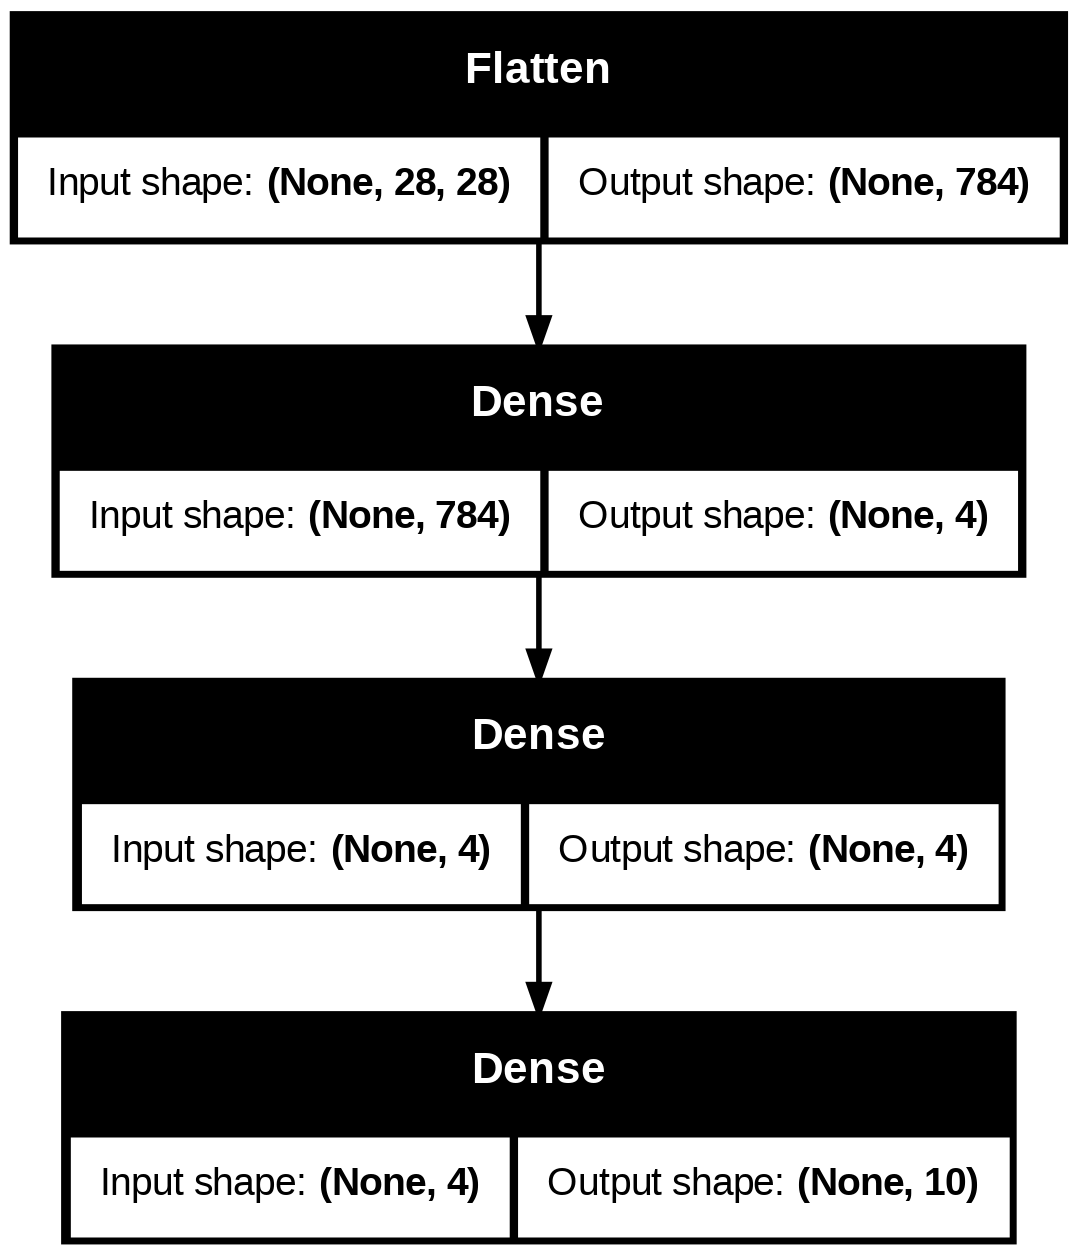

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model_13,show_shapes=True)